In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Narissa-Sh/test-repo/master/bitcoin_v1.csv'
data = pd.read_csv(url, na_filter=False)



In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['font.size'] = 14

In [3]:
data.head()

,Date,Open,High,Low,Last,Vol,Diff,Hash,LS,LS_TH_S,LS_P,LS_MWh_TH,HS,HS_TH_S,HS_P,HS_MWh_TH,UK_EP,US_EP,AUS_EP,RU_EP
0,2012-04-19,5.17,5.18,5.06,5.13,288111.6243,1577913,12.236407,S0,0.09,149.5,10.8,S0+,0.5,1129.5,7.56,73.481478,28.19,39.0783727,30.0426
1,2012-04-20,5.15,5.38,5.09,5.38,288111.6243,1577913,12.236407,S0,0.09,149.5,10.8,S0+,0.5,1129.5,7.56,73.041720,28.45,45.4834287,29.5864
2,2012-04-21,5.40,5.43,5.19,5.24,336827.7813,1577913,11.530460,S0,0.09,149.5,10.8,S0+,0.5,1129.5,7.56,73.041720,26.10,36.9784395,30.5039
3,2012-04-22,5.24,5.25,5.17,5.17,336827.7813,1577913,11.530460,S0,0.09,149.5,10.8,S0+,0.5,1129.5,7.56,73.041720,27.02,30.5841321,25.7296
4,2012-04-23,5.20,5.25,5.00,5.00,279236.4544,1577913,11.608899,S0,0.09,149.5,10.8,S0+,0.5,1129.5,7.56,74.744010,32.00,38.192742,30.6223


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
import seaborn as sns


C:\Users\U0123724\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


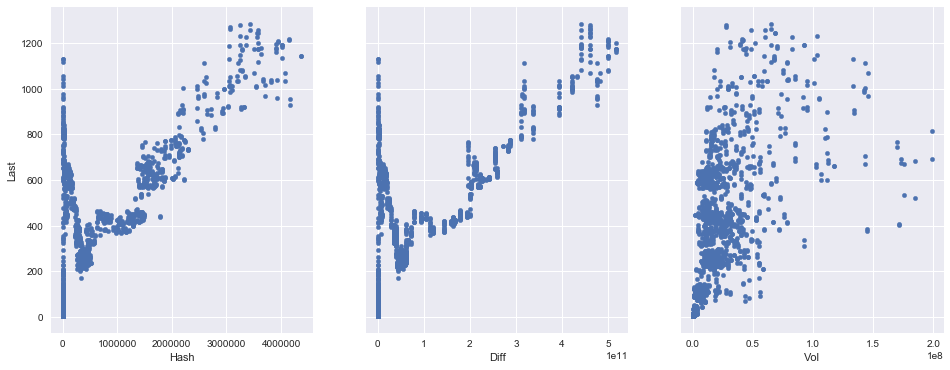

In [6]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Hash', y='Last', ax=axs[0], figsize=(16, 6))
data.plot(kind='scatter', x='Diff', y='Last', ax=axs[1])
data.plot(kind='scatter', x='Vol', y='Last', ax=axs[2])

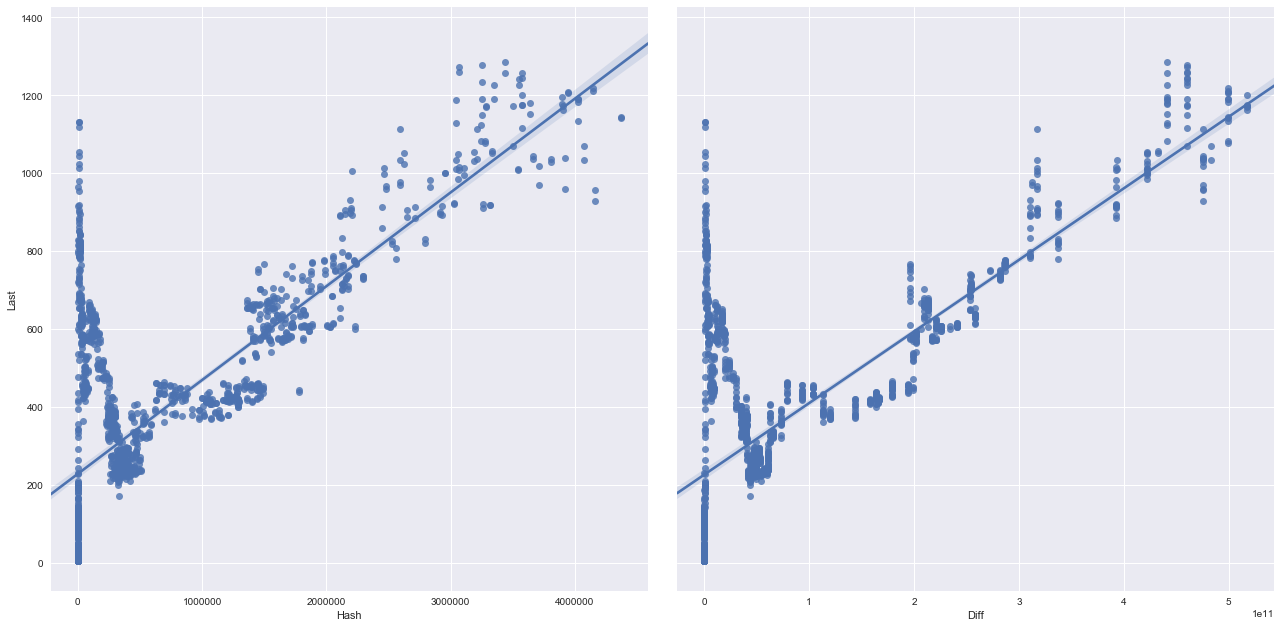

In [7]:
sns.pairplot(data, x_vars=['Hash', 'Diff'], y_vars='Last', size=9, aspect=1, kind='reg')

In [9]:
data.corr()

,Open,High,Low,Last,Vol,Diff,Hash,LS_TH_S,LS_P,LS_MWh_TH,HS_TH_S,HS_P,HS_MWh_TH,UK_EP,US_EP,RU_EP,Year,Month
Open,1.000000,0.998633,0.996683,0.997368,0.576715,0.732454,0.729677,0.518955,0.651599,-0.563536,0.629500,0.590051,-0.564780,-0.255955,0.056297,-0.396403,0.718131,-0.106761
High,0.998633,1.000000,0.995355,0.998357,0.597091,0.724163,0.721665,0.509455,0.642369,-0.554289,0.619740,0.578859,-0.553351,-0.246827,0.060896,-0.388244,0.709163,-0.105706
Low,0.996683,0.995355,1.000000,0.998149,0.545059,0.745123,0.742285,0.532964,0.662634,-0.575175,0.643817,0.605981,-0.581197,-0.266843,0.046325,-0.407624,0.730668,-0.107063
Last,0.997368,0.998357,0.998149,1.000000,0.575165,0.733653,0.731077,0.519854,0.649815,-0.561936,0.630706,0.590337,-0.564631,-0.253872,0.053650,-0.396003,0.717921,-0.104599
Vol,0.576715,0.597091,0.545059,0.575165,1.000000,0.379685,0.378638,0.336355,0.394710,-0.356767,0.348727,0.278211,-0.303043,-0.148323,0.054522,-0.313994,0.413437,-0.060644
Diff,0.732454,0.724163,0.745123,0.733653,0.379685,1.000000,0.993981,0.786461,0.696283,-0.650508,0.896982,0.684557,-0.735150,-0.401625,-0.218896,-0.622291,0.819212,-0.128097
Hash,0.729677,0.721665,0.742285,0.731077,0.378638,0.993981,1.000000,0.779444,0.689192,-0.642658,0.888687,0.679754,-0.726918,-0.398840,-0.220519,-0.614365,0.812616,-0.133088
LS_TH_S,0.518955,0.509455,0.532964,0.519854,0.336355,0.786461,0.779444,1.000000,0.873244,-0.816781,0.940567,0.863260,-0.848395,-0.530839,-0.260810,-0.841169,0.853903,0.002977
LS_P,0.651599,0.642369,0.662634,0.649815,0.394710,0.696283,0.689192,0.873244,1.000000,-0.977888,0.814333,0.838528,-0.946438,-0.540066,-0.169142,-0.875141,0.930595,-0.031905
LS_MWh_TH,-0.563536,-0.554289,-0.575175,-0.561936,-0.356767,-0.650508,-0.642658,-0.816781,-0.977888,1.000000,-0.751384,-0.753254,0.956319,0.525469,0.185489,0.907200,-0.912082,0.037606


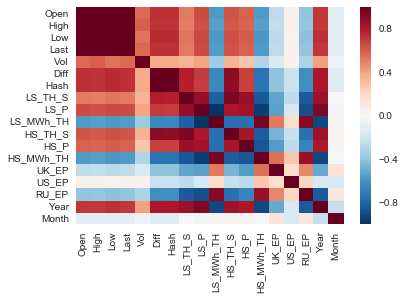

In [10]:
sns.heatmap(data.corr())

In [12]:
cols = ['Hash', 'Diff']
X = data[cols]
y = data.Last

linreg = LinearRegression()
linreg.fit(X, y)


print linreg.intercept_
print linreg.coef_

226.201461581
[  5.04849232e-05   1.45608964e-09]


In [ ]:
print lr.coef_

In [ ]:
#Rolling average 7 days
data[['Last']].resample('D').mean().rolling(window=7, center=True).mean().head(10)
                                                                            

In [ ]:
#Plot rolling average, 14 days, smooth random changes, remove outliers, remove large trend
data[['Last']].resample('D').mean().rolling(window=14, center=True).mean().plot()

In [ ]:
#diff function - window n (??งง)
data['Last'].diff(periods=1).head(10)

In [ ]:
#expand function
data[['Last']].resample('D').mean().expanding().mean().head()

In [ ]:
#plot 15 days rolling mean
data[['Last']].resample('D').mean().rolling(window=15).mean().plot()

In [ ]:
# Identify the date with largest drop in price from the same date in the previous month

average_daily_last = data[['Last']].resample('D').mean()
average_daily_last['DiffVsLastWeek'] = average_daily_last[['Last']].diff(periods=7)
average_daily_last.sort_values(by='DiffVsLastWeek').head(15)                                                    

In [ ]:
#price correlation wiht pior week, a week earlier, 4 weeks earlier and 1 year earlier
average_weekly_last = data[['Last']].resample('W').mean()

print('Correlation with last day: {}'.format(average_weekly_last['Last'].autocorr(lag=1)))
print('Correlation with last day: {}'.format(average_weekly_last['Last'].autocorr(lag=4)))
print('Correlation with last day: {}'.format(average_weekly_last['Last'].autocorr(lag=52)))

In [ ]:
#plot autocorr
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(average_weekly_last['Last'])

In [ ]:
# Autocorrelation 
# https://coolstatsblog.com/2013/08/07/how-to-use-the-autocorreation-function-acf/
# ACF is “decaying”, or decreasing, remains well above the significance range (dotted blue lines). This is indicative of a non-stationary series.
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(average_weekly_last['Last'], lags=50)

In [ ]:
# Split the weekly sales data in a training and test set - using 75% of the data for training
n = len(average_weekly_last.Last)

train = average_weekly_last.Last[:int(.75*n)]
test = average_weekly_last.Last[int(.75*n):]

In [ ]:
#Create an AR(1) model on the training data and compute the mean absolute error of the predictions.
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [ ]:
#AR(1) model # To compute Mean absolute error

model = sm.tsa.ARIMA(train, (1, 0, 0)).fit()
print model.summary()
#http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
#http://www.statsmodels.org/devel/examples/notebooks/generated/tsa_arma_0.html

In [ ]:
model.resid.plot()

In [ ]:
plot_acf(model.resid, lags=30)

In [ ]:
model = sm.tsa.ARIMA(train, (2, 0, 0)).fit()
print model.summary()

In [ ]:
model = sm.tsa.ARIMA(train, (2, 0, 2)).fit()
print model.summary()

In [ ]:
model = sm.tsa.ARIMA(train, (2, 1, 3)).fit()
print model.summary()